Frequências da banda de passagem (rad/s): [ 1884.95559215 18849.55592154]
Frequências da banda de rejeição (rad/s): [  942.47779608 37699.11184308]
Ordem do filtro calculada pela Scipy (n): 6
Frequências de corte naturais (rad/s): [ 1884.34531827 18855.66063689]
--- Protótipo Passa-Baixas Normalizado (ZPK) ---
Zeros: []
Polos: [-0.25881905+0.96592583j -0.70710678+0.70710678j -0.96592583+0.25881905j
 -0.96592583-0.25881905j -0.70710678-0.70710678j -0.25881905-0.96592583j]
Ganho: 1.0
Frequência Central (wo): 5960.75 rad/s
Largura de Banda (bw): 16964.60 rad/s

--- Filtro Passa-Faixa Final (ZPK) ---
Zeros: [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Polos: [  -405.95007837 -1858.72503442j  -1269.59004497 -1610.48597528j
  -2208.82752366  -810.3036087j   -2208.82752366  +810.3036087j
  -1269.59004497 +1610.48597528j   -405.95007837 +1858.72503442j
  -3984.81157943+18245.27062525j -10726.19388805+13606.26990831j
 -14177.71806717 +5201.0652665j  -14177.71806717 -5201.0652665j
 -10726.1938880

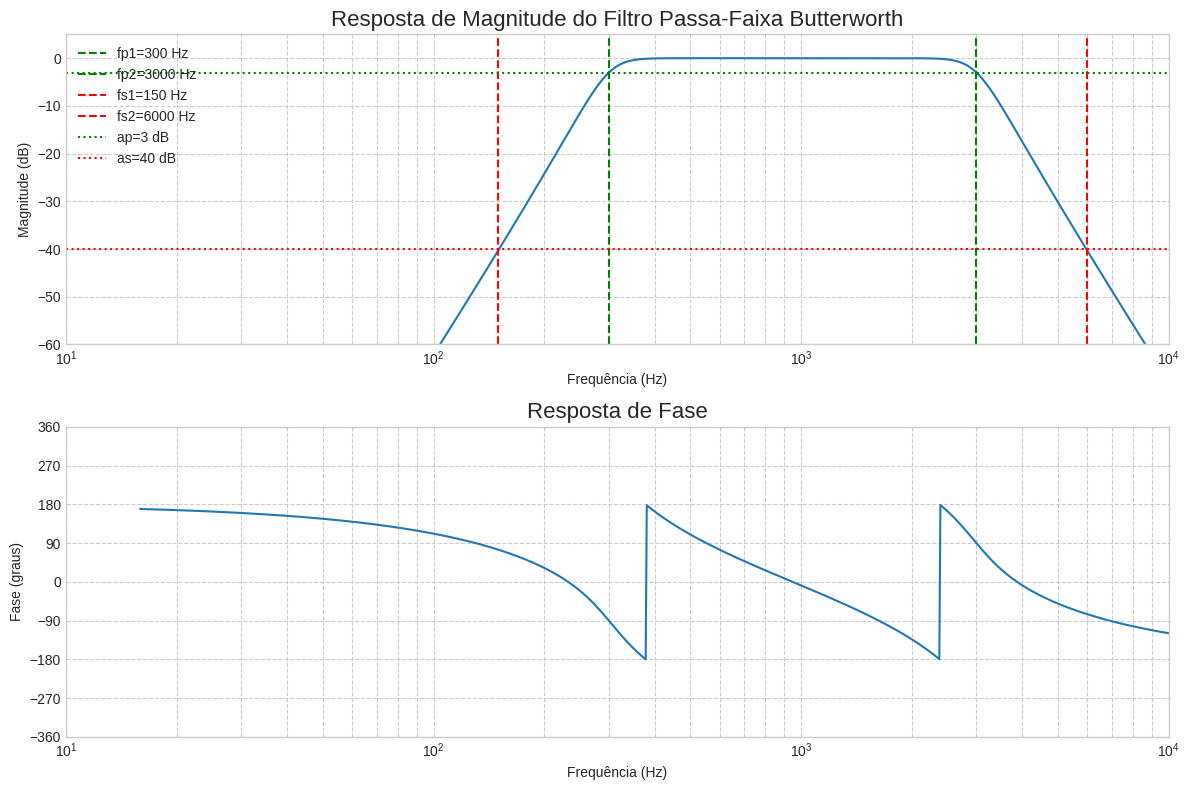

In [ ]:
# coding: utf-8
"""
# Projeto de Filtro Analógico com Python e Scipy

Este notebook serve como um guia didático para o projeto de filtros analógicos,
seguindo a metodologia clássica baseada em protótipos passa-baixas normalizados
e transformações de frequência.

O processo, inspirado na teoria de processamento de sinais, será demonstrado
passo a passo utilizando as bibliotecas do Python: `numpy` para
cálculos numéricos, `scipy.signal` para as funções de projeto de filtros, e
`matplotlib.pyplot` para a visualização dos resultados.

## Fluxo do Projeto

Seguiremos 6 passos, conforme o fluxograma de projeto:

1.  **Definição das Especificações:** Definir o que o filtro precisa fazer (tipo, frequências, atenuações).
2.  **Cálculo do Fator de Seletividade ($\\Omega_r$):** Normalizar as especificações de frequência.
3.  **Cálculo da Ordem do Filtro (n):** Determinar a complexidade mínima do filtro para atender às especificações.
4.  **Obtenção do Protótipo Passa-Baixas Normalizado:** Encontrar a função de transferência de um filtro de referência.
5.  **Aplicação da Transformação de Frequência:** Converter o protótipo no filtro desejado (LP, HP, BP, BS).
6.  **Análise e Verificação do Filtro Final:** Plotar a resposta em frequência e verificar se as especificações foram atendidas.

Vamos começar!
"""

# ## 1. Importação das Bibliotecas
# Primeiro, vamos importar as bibliotecas que usaremos ao longo do exercício.
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import buttord, butter, freqs, zpk2tf, lp2bp_zpk

# Configurações para os gráficos ficarem mais legíveis
plt.style.use('seaborn-v0_8-whitegrid')

r"""
## Passo 1: Definição das Especificações do Filtro

Vamos projetar um filtro **Passa-Faixa (Band-Pass)** do tipo **Butterworth**.
Este tipo de filtro é um ótimo ponto de partida por não possuir ondulações (ripple)
nem na banda de passagem nem na de rejeição.

As especificações são:
-   **Banda de Passagem:** entre 300 Hz e 3000 Hz.
-   **Atenuação máxima na banda de passagem ($a_p$):** 3 dB.
-   **Bandas de Rejeição:** abaixo de 150 Hz e acima de 6000 Hz.
-   **Atenuação mínima na banda de rejeição ($a_s$):** 40 dB.

Vamos definir essas especificações em variáveis. A biblioteca `scipy` trabalha
com frequências angulares (rad/s), então faremos a conversão de Hz para rad/s
($\omega = 2 \pi f$).
"""

# --- Especificações do Filtro ---
# Frequências (em Hz)
fp1, fp2 = 300, 3000  # Limites da banda de passagem
fs1, fs2 = 150, 6000  # Limites da banda de rejeição

# Ganhos (em dB)
ap = 3   # Ripple máximo na banda de passagem (atenuação)
as_ = 40  # Atenuação mínima na banda de rejeição

# --- Conversão para rad/s ---
wp = 2 * np.pi * np.array([fp1, fp2])
ws = 2 * np.pi * np.array([fs1, fs2])

print(f"Frequências da banda de passagem (rad/s): {wp}")
print(f"Frequências da banda de rejeição (rad/s): {ws}")

r"""
## Passo 2 e 3: Cálculo da Ordem do Filtro (n)

Antes de qualquer transformação, precisamos saber a ordem `n` do protótipo
passa-baixas. A ordem determina quão "íngreme" é a transição entre a banda
de passagem e a de rejeição.

Para um filtro Butterworth, a ordem pode ser calculada pela fórmula:
$n \ge \frac{\log_{10}( (10^{0.1 a_s} - 1) / (10^{0.1 a_p} - 1) )}{2 \log_{10}(\Omega_r)}$

Onde $\Omega_r$ é o fator de seletividade. Para um filtro passa-faixa, ele é
definido como a razão entre a largura de banda de rejeição e a de passagem:
$\Omega_r = \frac{BW_{stop}}{BW_{pass}} = \frac{\omega_{s2} - \omega_{s1}}{\omega_{p2} - \omega_{p1}}$

A `scipy` possui uma função muito útil, a `buttord`, que faz exatamente
esse cálculo para nós. Vamos usá-la e depois comparar com o cálculo manual
para fins didáticos.
"""

# --- Cálculo da Ordem com `scipy.signal.buttord` ---
# A função retorna a ordem (n) e a frequência de corte natural (Wn)
n, Wn = buttord(wp, ws, ap, as_, analog=True)

print(f"Ordem do filtro calculada pela Scipy (n): {int(np.ceil(n))}")  # A ordem 'n' (float) é arredondada para cima (int) para atender às especificações.
print(f"Frequências de corte naturais (rad/s): {Wn}")

# Arredondamos 'n' para o próximo inteiro, pois a ordem deve ser um inteiro.
n = int(np.ceil(n))


"""
## Passo 4: Obtenção do Protótipo Passa-Baixas Normalizado

Agora que temos a ordem `n`, podemos obter o protótipo passa-baixas
normalizado. "Normalizado" significa que sua frequência de corte é 1 rad/s.

Usamos a função `scipy.signal.butter` para isso, especificando:
- `n`: a ordem do filtro.
- `Wn=1`: a frequência de corte normalizada.
- `btype='low'`: para o protótipo passa-baixas.
- `analog=True`: para um filtro analógico.
- `output='zpk'`: para obter os Zeros, Polos e Ganho, que é a forma mais
  adequada para realizar transformações de frequência.
"""

# Obtém os Zeros (z), Polos (p) e o Ganho (k) do protótipo Butterworth. A função buttap(N) também poderia ser usada
z_proto, p_proto, k_proto = butter(n, 1, btype='low', analog=True, output='zpk')

print("--- Protótipo Passa-Baixas Normalizado (ZPK) ---")
print(f"Zeros: {z_proto}")
print(f"Polos: {p_proto}")
print(f"Ganho: {k_proto}")

r"""
## Passo 5: Aplicação da Transformação de Frequência (LP -> BP)

Este é o coração do processo. Vamos transformar nosso protótipo passa-baixas
(LP) em um filtro passa-faixa (BP).

A transformação LP $\rightarrow$ BP é dada por:
$S \rightarrow \frac{s^2 + \omega_o^2}{s \cdot BW}$

Onde:
- $\omega_o = \sqrt{\omega_{p1} \cdot \omega_{p2}}$ é a frequência central geométrica.
- $BW = \omega_{p2} - \omega_{p1}$ é a largura da banda de passagem.

A biblioteca `scipy` nos oferece a função `lp2bp_zpk` para aplicar essa
transformação diretamente nos zeros, polos e ganho do nosso protótipo.
"""

# Calcular wo e bw para a transformação
wo = np.sqrt(wp[0] * wp[1])
bw = wp[1] - wp[0]

print(f"Frequência Central (wo): {wo:.2f} rad/s")
print(f"Largura de Banda (bw): {bw:.2f} rad/s")

# Aplicar a transformação LP -> BP
z_bp, p_bp, k_bp = lp2bp_zpk(z_proto, p_proto, k_proto, wo=wo, bw=bw)

print("\n--- Filtro Passa-Faixa Final (ZPK) ---")
print(f"Zeros: {z_bp}")
print(f"Polos: {p_bp}")
print(f"Ganho: {k_bp}")
print(f"\nObserve que a ordem do filtro dobrou: de n={n} para {len(p_bp)} polos.")


"""
## Passo 6: Análise e Verificação do Filtro Final

Com os zeros, polos e ganho do nosso filtro passa-faixa final, podemos
analisar sua resposta em frequência.

Primeiro, vamos converter o formato ZPK para o formato de Função de
Transferência (numerador `b` e denominador `a`), que é mais comum.

Depois, usaremos a função `scipy.signal.freqs` para calcular a resposta em
frequência do filtro.
"""

# Converter ZPK para Função de Transferência (b, a)
b_bp, a_bp = zpk2tf(z_bp, p_bp, k_bp)

# --- Verificação Cruzada ---
# Para garantir que nosso processo passo a passo está correto, vamos projetar
# o mesmo filtro usando a função `butter` diretamente no modo 'bandpass'.
b_direct, a_direct = butter(n, Wn, btype='bandpass', analog=True, output='ba')

# Comparando os coeficientes (eles devem ser praticamente idênticos)
print("\n--- Verificação Cruzada ---")
print("Coeficientes do numerador (nosso método):", np.round(b_bp, 2))
print("Coeficientes do numerador (método direto):", np.round(b_direct, 2))


# --- Visualização da Resposta em Frequência ---
# Gerar um vetor de frequências para o plot
w_vec = np.logspace(np.log10(100), np.log10(100000), 1000)
w_freqs, h_response = freqs(b_bp, a_bp, worN=w_vec)

# Criar a figura para o gráfico
plt.figure(figsize=(12, 8))

# Plot da Magnitude
plt.subplot(2, 1, 1)
plt.semilogx(w_freqs / (2*np.pi), 20 * np.log10(abs(h_response)))
plt.title('Resposta de Magnitude do Filtro Passa-Faixa Butterworth', fontsize=16)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', linestyle='--')
plt.axis([10, 10000, -60, 5])

# Linhas de especificação para verificação visual
plt.axvline(fp1, color='green', linestyle='--', label=f'fp1={fp1} Hz')
plt.axvline(fp2, color='green', linestyle='--', label=f'fp2={fp2} Hz')
plt.axvline(fs1, color='red', linestyle='--', label=f'fs1={fs1} Hz')
plt.axvline(fs2, color='red', linestyle='--', label=f'fs2={fs2} Hz')
plt.axhline(-ap, color='green', linestyle=':', label=f'ap={ap} dB')
plt.axhline(-as_, color='red', linestyle=':', label=f'as={as_} dB')
plt.legend()

# Plot da Fase
plt.subplot(2, 1, 2)
plt.semilogx(w_freqs / (2*np.pi), np.angle(h_response, deg=True))
plt.title('Resposta de Fase', fontsize=16)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (graus)')
plt.grid(True, which='both', linestyle='--')
plt.axis([10, 10000, -360, 360])
plt.yticks([-360, -270, -180, -90, 0, 90, 180, 270, 360])

plt.tight_layout()
plt.show()

# ## Conclusão
#
# Conseguimos projetar com sucesso um filtro analógico passa-faixa seguindo
# todo o processo teórico.
#
# - **Confirmamos** que as especificações de atenuação e frequência foram atendidas, como pode ser visto pelas linhas tracejadas no gráfico de magnitude.
# - **Validamos** nosso processo passo a passo ao comparar o resultado com o projeto direto feito pela função `butter`, mostrando a consistência da teoria com as ferramentas práticas.
# - **Visualizamos** o comportamento do filtro, entendendo como ele atenua as frequências fora da banda de passagem desejada.
#
# Este notebook pode ser facilmente adaptado para projetar outros tipos de filtros
# (Passa-Baixas, Passa-Altas, Rejeita-Faixa) ou usar outras aproximações
# (Chebyshev, Elliptic), simplesmente alterando as especificações iniciais e
# usando as funções correspondentes da `scipy` (ex: `cheb1ord`, `lp2hp_zpk`, etc.).



Banda de passagem (rad/s): [ 1884.95559215 18849.55592154]
Banda de rejeição (rad/s): [  942.47779608 37699.11184308]
Ordem do filtro: 6
Frequência de corte natural (rad/s): [ 1884.34531827 18855.66063689]
--- Protótipo LP Normalizado ---
Polos: [-0.25881905+0.96592583j -0.70710678+0.70710678j -0.96592583+0.25881905j
 -0.96592583-0.25881905j -0.70710678-0.70710678j -0.25881905-0.96592583j]
Ordem final (BP): 12 polos

Verificação Cruzada:
Numerador (nosso método): [2.38375598e+25 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Numerador (direto): [2.38942286e+25 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


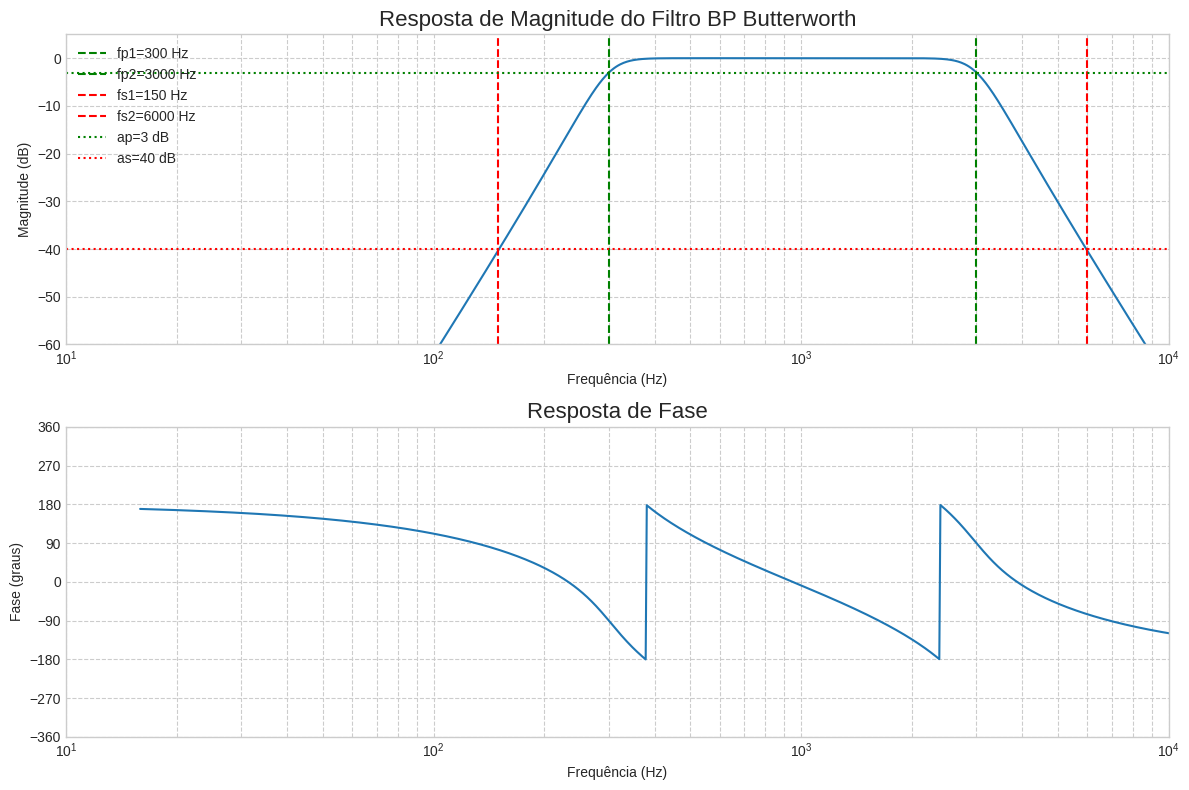

In [ ]:
# coding: utf-8
"""
Projeto de Filtro Analógico: redução direta c Python e Scipy
"""

# Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import buttord, butter, freqs, zpk2tf, lp2bp_zpk

plt.style.use('seaborn-v0_8-whitegrid')

# --- Especificações do Filtro ---
fp1, fp2 = 300, 3000  # Banda de passagem (Hz)
fs1, fs2 = 150, 6000  # Banda de rejeição (Hz)
ap = 3                # Ripple (dB)
as_ = 40              # Atenuação mínima (dB)

# Conversão para rad/s
wp = 2 * np.pi * np.array([fp1, fp2])
ws = 2 * np.pi * np.array([fs1, fs2])

print(f"Banda de passagem (rad/s): {wp}")
print(f"Banda de rejeição (rad/s): {ws}")

# --- Cálculo da Ordem ---
n, Wn = buttord(wp, ws, ap, as_, analog=True)
n = int(np.ceil(n))

print(f"Ordem do filtro: {n}")
print(f"Frequência de corte natural (rad/s): {Wn}")

# --- Protótipo Passa-Baixas Normalizado --- A função buttap(N) também poderia ser usada
z_proto, p_proto, k_proto = butter(n, 1, btype='low', analog=True, output='zpk')

print("--- Protótipo LP Normalizado ---")
print(f"Polos: {p_proto}")

# --- Transformação LP -> BP ---
wo = np.sqrt(wp[0] * wp[1])  # Frequência central
bw = wp[1] - wp[0]           # Largura de banda

z_bp, p_bp, k_bp = lp2bp_zpk(z_proto, p_proto, k_proto, wo=wo, bw=bw)

print(f"Ordem final (BP): {len(p_bp)} polos")

# --- Conversão ZPK -> Função de Transferência ---
b_bp, a_bp = zpk2tf(z_bp, p_bp, k_bp)

# Verificação cruzada com método direto
b_direct, a_direct = butter(n, Wn, btype='bandpass', analog=True, output='ba')
print("\nVerificação Cruzada:")
print("Numerador (nosso método):", np.round(b_bp, 2))
print("Numerador (direto):", np.round(b_direct, 2))

# --- Resposta em Frequência ---
w_vec = np.logspace(np.log10(100), np.log10(100000), 1000)
w_freqs, h_response = freqs(b_bp, a_bp, worN=w_vec)

plt.figure(figsize=(12, 8))

# Magnitude
plt.subplot(2, 1, 1)
plt.semilogx(w_freqs / (2*np.pi), 20 * np.log10(abs(h_response)))
plt.title('Resposta de Magnitude do Filtro BP Butterworth', fontsize=16)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', linestyle='--')
plt.axis([10, 10000, -60, 5])
plt.axvline(fp1, color='green', linestyle='--', label=f'fp1={fp1} Hz')
plt.axvline(fp2, color='green', linestyle='--', label=f'fp2={fp2} Hz')
plt.axvline(fs1, color='red', linestyle='--', label=f'fs1={fs1} Hz')
plt.axvline(fs2, color='red', linestyle='--', label=f'fs2={fs2} Hz')
plt.axhline(-ap, color='green', linestyle=':', label=f'ap={ap} dB')
plt.axhline(-as_, color='red', linestyle=':', label=f'as={as_} dB')
plt.legend()

# Fase
plt.subplot(2, 1, 2)
plt.semilogx(w_freqs / (2*np.pi), np.angle(h_response, deg=True))
plt.title('Resposta de Fase', fontsize=16)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (graus)')
plt.grid(True, which='both', linestyle='--')
plt.axis([10, 10000, -360, 360])
plt.yticks([-360, -270, -180, -90, 0, 90, 180, 270, 360])

plt.tight_layout()
plt.show()
